# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo, Daniel Matlock

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [31]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [32]:
import pandas as pd
from seebuoy import NDBC

In [33]:
ndbc = NDBC()

In [34]:
df_avail = ndbc.available_data(station_id="44091")

In [35]:
df_data = ndbc.get_data("44065")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2024-03-09 00:00:00,NaN,4.0,5.0,NaN,NaN,NaN,NaN,1025.0,NaN,6.6,NaN,NaN,0.3,NaN
2024-03-09 00:10:00,NaN,5.0,6.0,1.2,NaN,5.9,84.0,1024.9,NaN,6.6,NaN,NaN,NaN,NaN
2024-03-09 00:20:00,NaN,5.0,6.0,1.2,11.0,5.9,84.0,1024.9,NaN,6.6,NaN,NaN,NaN,NaN
2024-03-09 00:30:00,NaN,5.0,7.0,NaN,NaN,NaN,NaN,1024.7,NaN,6.6,NaN,NaN,NaN,NaN
2024-03-09 00:40:00,NaN,5.0,7.0,NaN,NaN,NaN,NaN,1024.6,NaN,6.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 05:30:00,280.0,2.0,3.0,NaN,NaN,NaN,NaN,1020.7,9.1,9.6,5.4,NaN,NaN,NaN
2024-04-23 05:40:00,280.0,2.0,3.0,NaN,NaN,NaN,NaN,1020.8,9.1,9.4,5.6,NaN,NaN,NaN
2024-04-23 05:50:00,290.0,2.0,3.0,0.5,9.0,4.4,135.0,1020.5,9.0,9.2,5.4,NaN,NaN,NaN


In [36]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [37]:
try:
    del df_data['pressure_tendency']
    del df_data['dewpoint']
    del df_data['air_temp']
except:
    pass

In [38]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
wind_direction,1942,2393,81.153364
dominant_period,866,2393,36.188884
water_temp,25,2393,1.044714
mean_wave_direction,16,2393,0.668617
wind_speed,15,2393,0.626828
pressure,15,2393,0.626828
wind_gust,15,2393,0.626828
wave_height,0,2393,0.000000
average_period,0,2393,0.000000


In [39]:
df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
date,,,,,,,,,
2024-03-09 00:10:00,NaN,5.0,6.0,1.2,NaN,5.9,84.0,1024.9,6.6
2024-03-09 00:20:00,NaN,5.0,6.0,1.2,11.0,5.9,84.0,1024.9,6.6
2024-03-09 00:50:00,NaN,5.0,6.0,1.3,10.0,6.0,102.0,1024.4,6.6
2024-03-09 01:10:00,NaN,5.0,6.0,1.3,NaN,5.8,91.0,1025.2,6.6
2024-03-09 01:20:00,NaN,5.0,6.0,1.3,8.0,5.8,91.0,1025.6,6.6
...,...,...,...,...,...,...,...,...,...
2024-04-23 04:20:00,240.0,3.0,4.0,0.5,4.0,4.0,200.0,1020.5,9.4
2024-04-23 04:50:00,250.0,3.0,4.0,0.5,9.0,4.3,113.0,1020.6,9.3
2024-04-23 05:10:00,270.0,2.0,3.0,0.5,NaN,4.4,117.0,1020.5,9.7


In [40]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

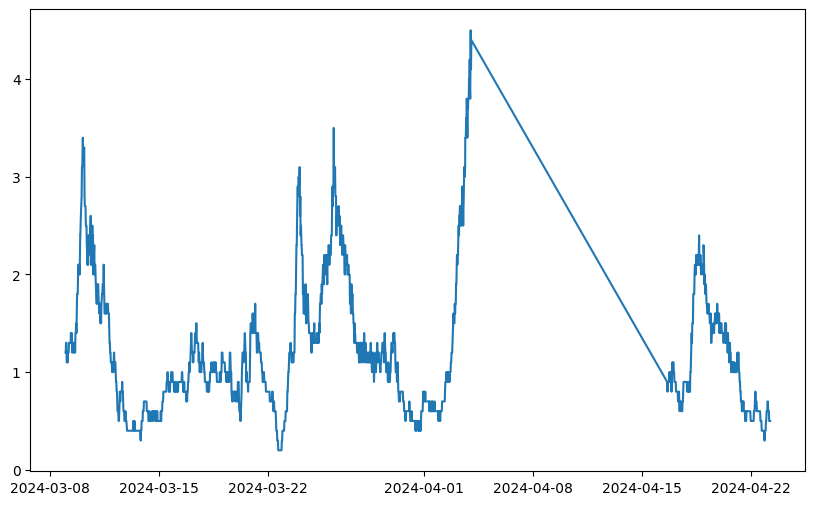

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

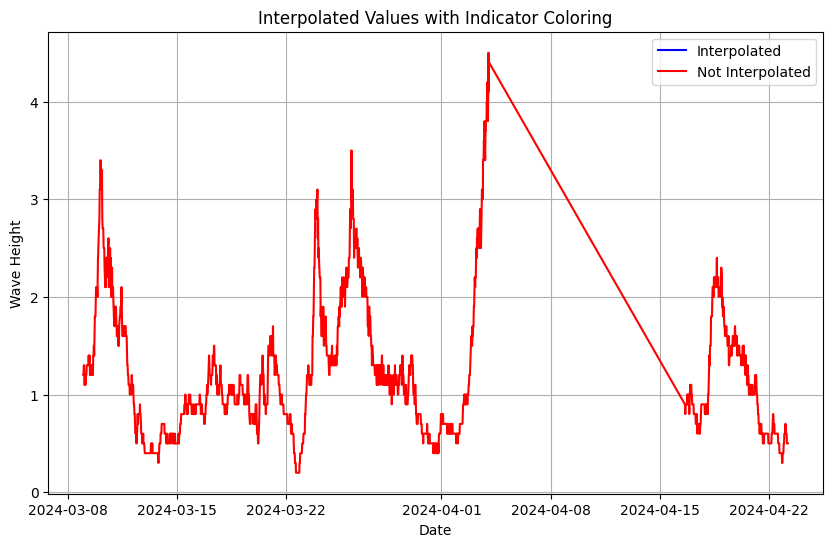

In [42]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [43]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

In [44]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})

# Initialize Prophet model
model = Prophet()
model.fit(modeling_df)

06:27:57 - cmdstanpy - INFO - Chain [1] start processing
06:27:57 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-03-09 00:10:00,1.915582,1.291576,2.367833,1.915582,1.915582,-0.095929,-0.095929,-0.095929,0.038793,0.038793,0.038793,-0.134722,-0.134722,-0.134722,0.0,0.0,0.0,1.819653
1,2024-03-09 00:20:00,1.914011,1.272818,2.340268,1.914011,1.914011,-0.095644,-0.095644,-0.095644,0.037340,0.037340,0.037340,-0.132983,-0.132983,-0.132983,0.0,0.0,0.0,1.818367
2,2024-03-09 00:50:00,1.909295,1.279782,2.299358,1.909295,1.909295,-0.095305,-0.095305,-0.095305,0.032166,0.032166,0.032166,-0.127471,-0.127471,-0.127471,0.0,0.0,0.0,1.813989
3,2024-03-09 01:10:00,1.906151,1.262741,2.350924,1.906151,1.906151,-0.095370,-0.095370,-0.095370,0.028183,0.028183,0.028183,-0.123553,-0.123553,-0.123553,0.0,0.0,0.0,1.810781
4,2024-03-09 01:20:00,1.904579,1.303995,2.309256,1.904579,1.904579,-0.095446,-0.095446,-0.095446,0.026076,0.026076,0.026076,-0.121522,-0.121522,-0.121522,0.0,0.0,0.0,1.809133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2024-05-09 05:50:00,-0.981555,-7.485947,5.654705,-7.511035,5.550742,0.084236,0.084236,0.084236,0.002085,0.002085,0.002085,0.082151,0.082151,0.082151,0.0,0.0,0.0,-0.897319
2409,2024-05-10 05:50:00,-1.088696,-8.336797,6.129535,-8.187754,6.082727,-0.026265,-0.026265,-0.026265,0.002085,0.002085,0.002085,-0.028349,-0.028349,-0.028349,0.0,0.0,0.0,-1.114961
2410,2024-05-11 05:50:00,-1.195838,-9.073287,6.678311,-9.171893,6.769421,-0.048677,-0.048677,-0.048677,0.002085,0.002085,0.002085,-0.050762,-0.050762,-0.050762,0.0,0.0,0.0,-1.244515
2411,2024-05-12 05:50:00,-1.302979,-9.211096,7.707897,-9.715448,7.291147,0.299914,0.299914,0.299914,0.002085,0.002085,0.002085,0.297829,0.297829,0.297829,0.0,0.0,0.0,-1.003066


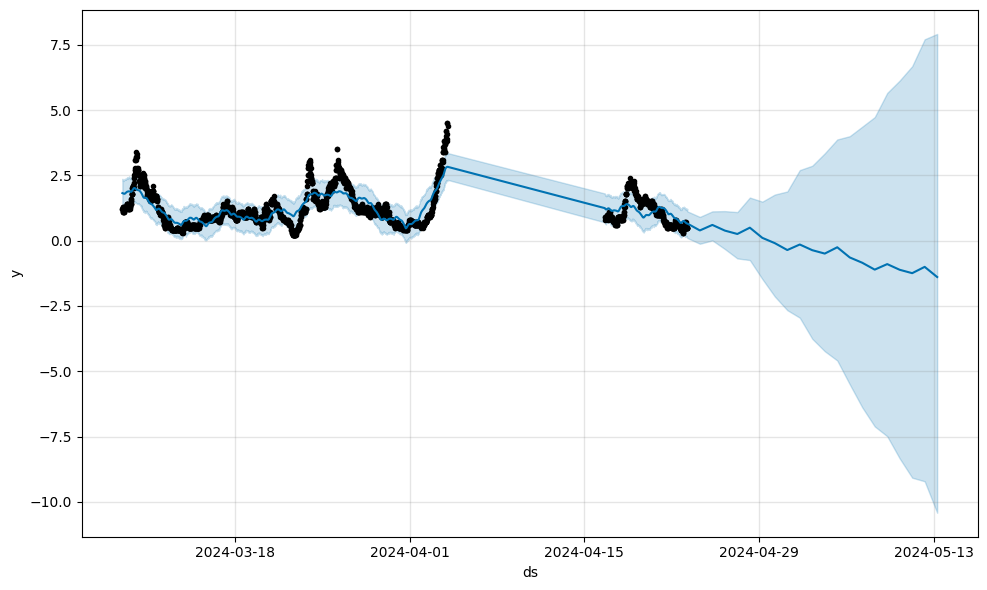

In [47]:
fig1 = model.plot(forecast)

In [48]:
today = pd.Timestamp.today()
future = forecast[forecast['ds'] >= today]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2393,2024-04-24 05:50:00,0.625565,-0.118408,0.909066,0.558272,0.685413,-0.234312,-0.234312,-0.234312,0.002085,0.002085,0.002085,-0.236397,-0.236397,-0.236397,0.0,0.0,0.0,0.391253
2394,2024-04-25 05:50:00,0.518424,0.010154,1.121487,0.305562,0.710461,0.084236,0.084236,0.084236,0.002085,0.002085,0.002085,0.082151,0.082151,0.082151,0.0,0.0,0.0,0.602660
2395,2024-04-26 05:50:00,0.411283,-0.320181,1.130921,-0.044944,0.827247,-0.026265,-0.026265,-0.026265,0.002085,0.002085,0.002085,-0.028349,-0.028349,-0.028349,0.0,0.0,0.0,0.385018
2396,2024-04-27 05:50:00,0.304141,-0.680112,1.093786,-0.452878,0.970536,-0.048677,-0.048677,-0.048677,0.002085,0.002085,0.002085,-0.050762,-0.050762,-0.050762,0.0,0.0,0.0,0.255464
2397,2024-04-28 05:50:00,0.197000,-0.742774,1.649800,-0.895719,1.196182,0.299914,0.299914,0.299914,0.002085,0.002085,0.002085,0.297829,0.297829,0.297829,0.0,0.0,0.0,0.496914
2398,2024-04-29 05:50:00,0.089859,-1.467101,1.493437,-1.357530,1.491565,0.017697,0.017697,0.017697,0.002085,0.002085,0.002085,0.015613,0.015613,0.015613,0.0,0.0,0.0,0.107556
2399,2024-04-30 05:50:00,-0.017283,-2.137811,1.764308,-1.856134,1.791999,-0.078000,-0.078000,-0.078000,0.002085,0.002085,0.002085,-0.080085,-0.080085,-0.080085,0.0,0.0,0.0,-0.095283
2400,2024-05-01 05:50:00,-0.124424,-2.660711,1.882604,-2.407700,2.101871,-0.234312,-0.234312,-0.234312,0.002085,0.002085,0.002085,-0.236397,-0.236397,-0.236397,0.0,0.0,0.0,-0.358736
2401,2024-05-02 05:50:00,-0.231565,-2.949862,2.701259,-2.894553,2.473331,0.084236,0.084236,0.084236,0.002085,0.002085,0.002085,0.082151,0.082151,0.082151,0.0,0.0,0.0,-0.147329
2402,2024-05-03 05:50:00,-0.338707,-3.757186,2.867740,-3.533114,2.791627,-0.026265,-0.026265,-0.026265,0.002085,0.002085,0.002085,-0.028349,-0.028349,-0.028349,0.0,0.0,0.0,-0.364972


In [ ]:
future

In [58]:
def WHBeaufort(m):
    if(m < 0):
        return("CLEAR - Calm (Level 0)")
    elif((m >= 0) and (m < 1)):
        return("CLEAR - Light Air (Level 1)")
    elif((m >= 1) and (m < 2)):
        return("CLEAR - Light Breeze (Level 2)")
    elif((m >= 2) and (m < 4)):
        return("CLEAR - Gentle Breeze (Level 3)")
    elif((m >= 4) and (m < 6)):
        return("CLEAR - Moderate Breeze (Level 4)")
    elif((m >= 6) and (m < 10)):
        return("PROCEED WITH CAUTION - Fresh Breeze (Level 5)")
    elif((m >= 9) and (m < 13)):
        return("PROCEED WITH CAUTION - Strong Breeze (Level 6)")
    elif((m >= 13) and (m < 19)):
        return("NOT RECOMMENDED - High wind, moderate gale, near gale (Level 7)")
    elif((m >= 19) and (m < 25)):
        return("NOT RECOMMENDED - Gale, Fresh Gale (Level 8)")
    elif((m >= 25) and (m < 32)):
        return("NOT RECOMMENDED - Strong/Severe Gale (Level 8)")
    elif((m >= 29) and (m < 41)):
        return("NOT RECOMMENDED - Storm, Whole Gale (Level 8)")
    elif((m >= 41) and (m < 52)):
        return("NOT RECOMMENDED - Violent Storm (Level 8)")
    elif(m <= 52):
        return("NOT RECOMMENDED - Hurricane Force (Level 8)")


In [66]:
from datetime import datetime
print("{:<30} {:<30} {:<30} {:<30}".format("Date", "Wave Height Forecasted (m)", "yhat upper / yhat lower", "Beaufort Scale"))
print()
for index, row in future.iterrows():
     day = datetime.strptime(str(row['ds']), "%Y-%m-%d %H:%M:%S").strftime("%A %B %d")
     high_low = str(round(row['yhat_lower'],2))+" / "+ str(round(row['yhat_upper'],2))
     predicted = str(round(row['yhat'],2))
     bf = WHBeaufort(float(predicted))
     print("{:<30} {:<30} {:<30} {:<30}".format(day, predicted, high_low, bf))




Date                           Wave Height Forecasted (m)     yhat upper / yhat lower        Beaufort Scale                

Wednesday April 24             0.39                           -0.12 / 0.91                   CLEAR - Light Air (Level 1)   
Thursday April 25              0.6                            0.01 / 1.12                    CLEAR - Light Air (Level 1)   
Friday April 26                0.39                           -0.32 / 1.13                   CLEAR - Light Air (Level 1)   
Saturday April 27              0.26                           -0.68 / 1.09                   CLEAR - Light Air (Level 1)   
Sunday April 28                0.5                            -0.74 / 1.65                   CLEAR - Light Air (Level 1)   
Monday April 29                0.11                           -1.47 / 1.49                   CLEAR - Light Air (Level 1)   
Tuesday April 30               -0.1                           -2.14 / 1.76                   CLEAR - Calm (Level 0)        
Wednesd

In [73]:
from datetime import datetime
df = pd.DataFrame(columns = ["Date", "Wave Height Forecasted (m)", "yhat upper", "yhat lower", "Beaufort Scale"])
print()
for index, row in future.iterrows():
     day = datetime.strptime(str(row['ds']), "%Y-%m-%d %H:%M:%S").strftime("%A %B %d")
     yhat_high = round(row['yhat_lower'],2)
     yhat_low = round(row['yhat_upper'],2)
     predicted = round(row['yhat'],2)
     bf = WHBeaufort(float(predicted))
     df = pd.concat([day, predicted, yhat_high, yhat_low, bf])

print(df)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid